1. Import libraries

1.1 intsall dependancy

In [ ]:
# %pip install pandas  numpy matplotlib seaborn scikit-learn lightgbm xgboost  joblib pickle  geneticalgorithm

1.2 import lib

In [1]:
# Data Manipulation libraries
import pandas as pd
import numpy as np
# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for normalization
from sklearn.preprocessing import StandardScaler
# for encoding
from sklearn.preprocessing import LabelEncoder
# for feature selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

# for model selection and training
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB 
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score

# for model evaluation
from sklearn.metrics import confusion_matrix, classification_report, f1_score

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# for model save
from joblib import dump, load
import pickle


# Seed for random state
SEED = 42

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13336\3759709016.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


 2. Importing Dataset

2.1 Read Columns

In [2]:
# Read column names
columns = pd.read_csv("./nsl-kdd/kddcup.names", names=['names'])
columns

,names
0,duration
1,protocol_type
2,service
3,flag
4,src_bytes
5,dst_bytes
6,land
7,wrong_fragment
8,urgent
9,hot


2.2 Load dataset

In [3]:
dataFrame = pd.read_csv("./nsl-kdd/KDDTrain+.txt",names=columns["names"])

dataFrame.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,target
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


2.3 General info about the dataset

In [4]:
dataFrame.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [5]:
dataFrame.shape

(125973, 43)

In [6]:
dataFrame.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

3. Data Visualisation

<Axes: xlabel='protocol_type', ylabel='count'>

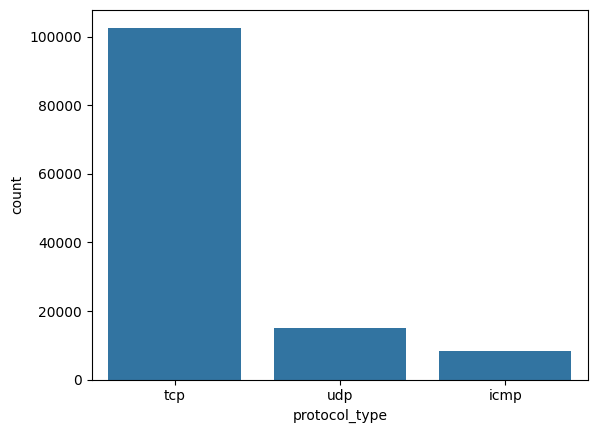

In [7]:
sns.countplot(data=dataFrame, x='protocol_type')

<Axes: xlabel='flag', ylabel='count'>

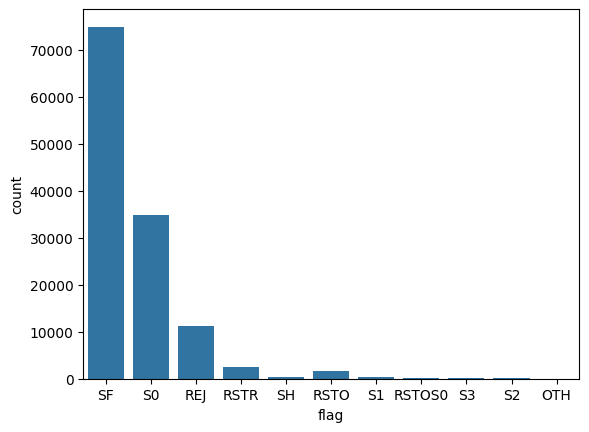

In [8]:
sns.countplot(data=dataFrame, x='flag')

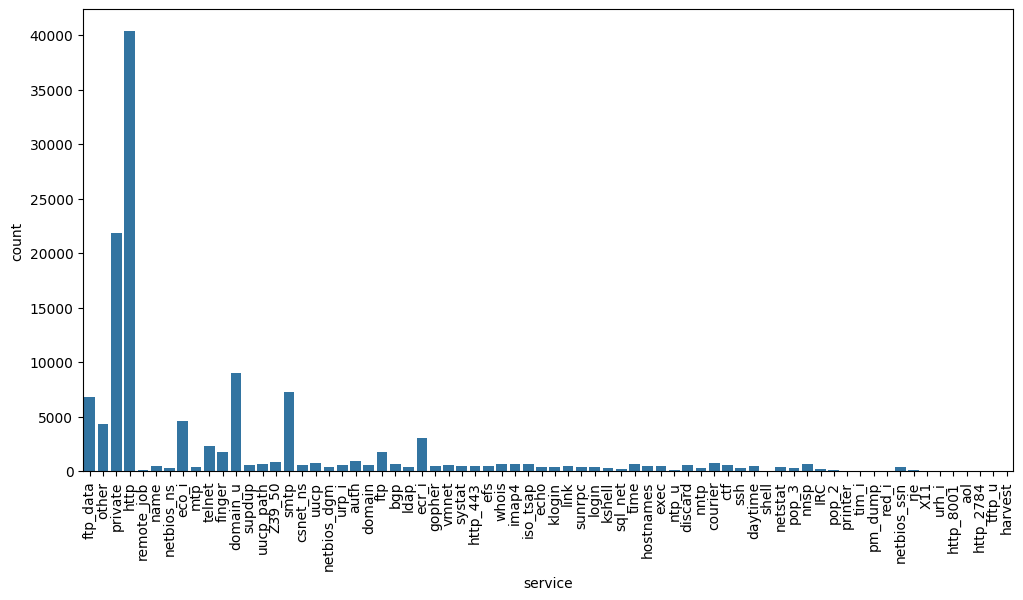

In [9]:
plt.figure(figsize=(12,6))

# Plot train data
sns.countplot(data=dataFrame, x="service")
plt.xticks(rotation=90)  # Rotating x-axis labels by 90 degrees
plt.show()

<Axes: xlabel='class', ylabel='count'>

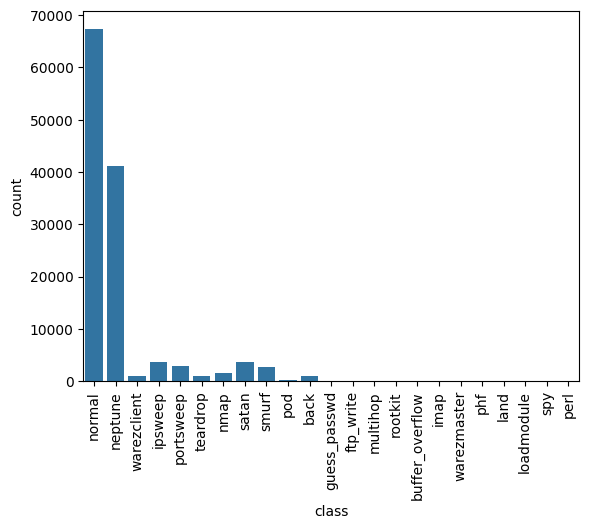

In [10]:
plt.xticks(rotation=90)
sns.countplot(dataFrame,x='class')

<Axes: xlabel='count', ylabel='class'>

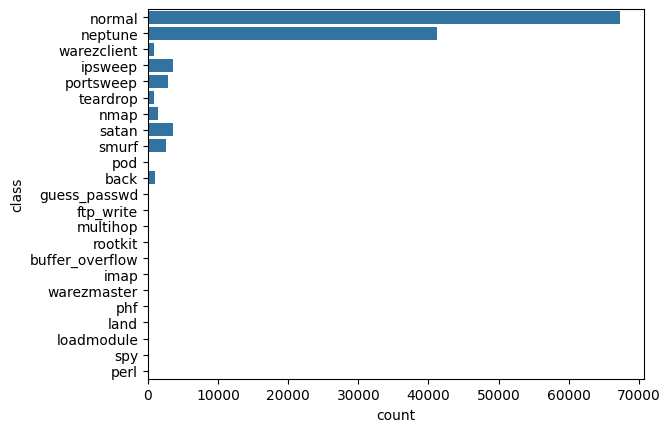

In [11]:
sns.countplot(dataFrame['class'])

<Axes: xlabel='count', ylabel='Count'>

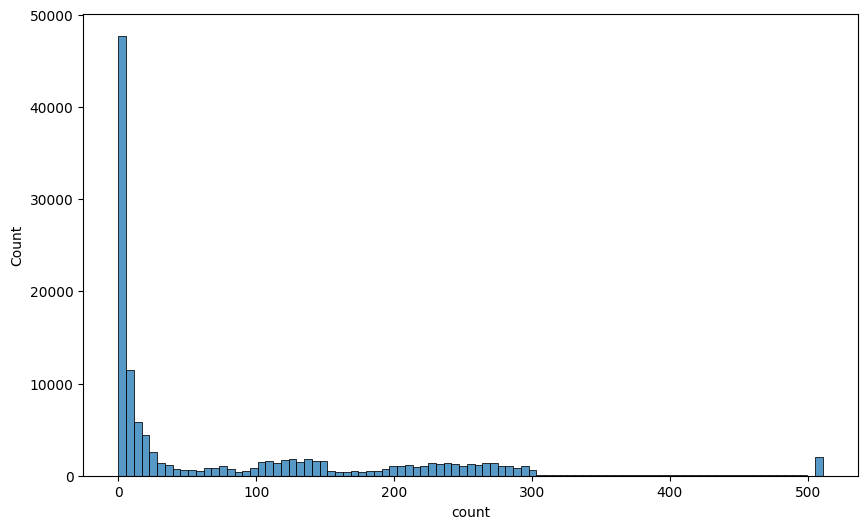

In [12]:
plt.figure(figsize=(10,6))
sns.histplot(dataFrame['count'], kde=False)

<Axes: xlabel='dst_host_srv_count', ylabel='Count'>

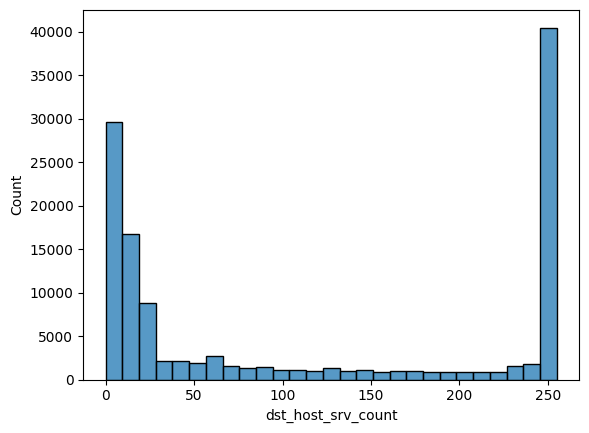

In [13]:
sns.histplot(dataFrame.dst_host_srv_count) 

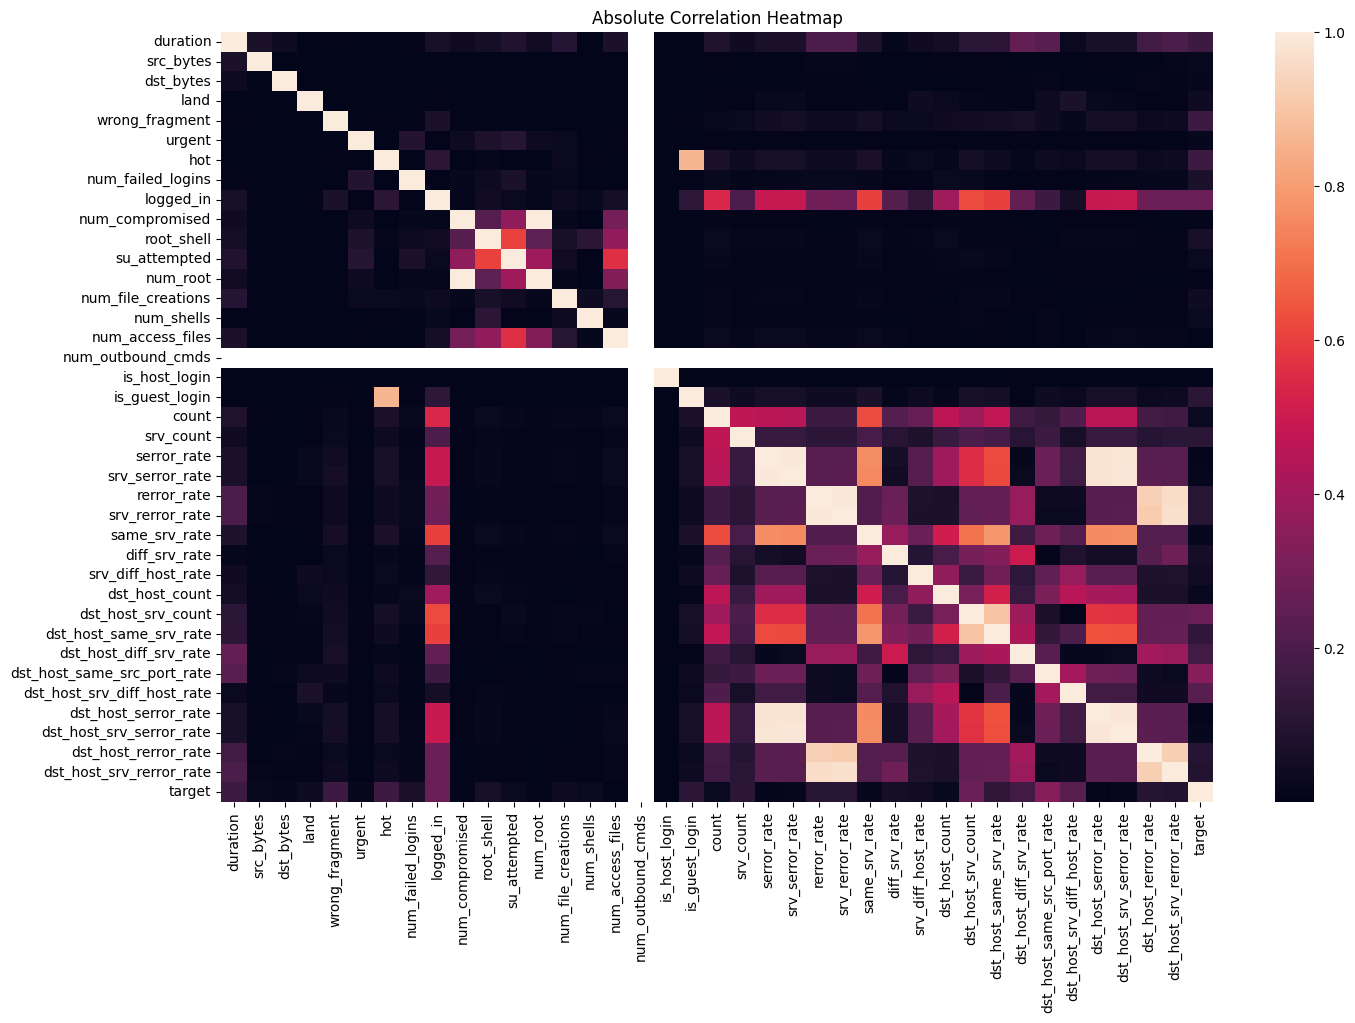

In [14]:
numeric_columns = dataFrame.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr().abs()

# Create the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix  )
plt.title('Absolute Correlation Heatmap')
plt.show()

4. Data Preprocessing

4.1 Update columns

In [15]:
dataFrame.loc[dataFrame['class'] == "normal", "class"] = 'normal'
dataFrame.loc[dataFrame['class'] != 'normal', "class"] = 'anomaly'

4.2  Encoding target class to 0 and 1

In [16]:
dataFrame.loc[dataFrame['class'] == "normal", "class"] = 0
dataFrame.loc[dataFrame['class'] != 0, "class"] = 1

4.3 Drop columns

In [17]:
cat_cols = ['is_host_login','num_outbound_cmds','protocol_type','service','flag','land', 'logged_in','is_guest_login']


for category in cat_cols:
    print(dataFrame[category].value_counts())  
    print(f"Number of unique values in {category}: {dataFrame[category].nunique()}")


is_host_login
0    125972
1         1
Name: count, dtype: int64
Number of unique values in is_host_login: 2
num_outbound_cmds
0    125973
Name: count, dtype: int64
Number of unique values in num_outbound_cmds: 1
protocol_type
tcp     102689
udp      14993
icmp      8291
Name: count, dtype: int64
Number of unique values in protocol_type: 3
service
http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6860
             ...  
tftp_u           3
http_8001        2
aol              2
harvest          2
http_2784        1
Name: count, Length: 70, dtype: int64
Number of unique values in service: 70
flag
SF        74945
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: count, dtype: int64
Number of unique values in flag: 11
land
0    125948
1        25
Name: count, dtype: int64
Number of unique values in land: 2
logged_in
0    76121
1    49852


In [18]:
dataFrame.drop(cat_cols, axis=1, inplace=True)

4.4 separte X(features) and Y(targets)

In [19]:
X = dataFrame.drop(['class'], axis=1)  
y = dataFrame['class']  

In [20]:
X.head()

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,491,0,0,0,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20
1,0,146,0,0,0,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15
2,0,0,0,0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19
3,0,232,8153,0,0,0,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21
4,0,199,420,0,0,0,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21


In [21]:
y.describe

<bound method NDFrame.describe of 0         0
1         0
2         1
3         0
4         0
         ..
125968    1
125969    0
125970    0
125971    1
125972    0
Name: class, Length: 125973, dtype: object>

In [22]:
y=y.astype('int')

In [23]:
y.describe

<bound method NDFrame.describe of 0         0
1         0
2         1
3         0
4         0
         ..
125968    1
125969    0
125970    0
125971    1
125972    0
Name: class, Length: 125973, dtype: int32>

4.5 check possible features

In [24]:
cat_cols=['duration','src_bytes','dst_bytes','wrong_fragment','urgent','hot','num_failed_logins','num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','target']
store = {}

for category in cat_cols:
    print(dataFrame[category].value_counts())
    print(f"Number of unique values in {category}: {dataFrame[category].nunique()}")
    if dataFrame[category].nunique() > 19:
        store[category] = dataFrame[category].nunique()

print(store)
print(len(cat_cols),len(store))

duration
0        115955
1          1989
2           843
3           557
4           351
          ...  
4946          1
5284          1
20771         1
3294          1
679           1
Name: count, Length: 2981, dtype: int64
Number of unique values in duration: 2981
src_bytes
0        49392
8         3691
1         2432
44        2334
45        2089
         ...  
1940         1
12973        1
1899         1
1661         1
2358         1
Name: count, Length: 3341, dtype: int64
Number of unique values in src_bytes: 3341
dst_bytes
0        67967
105       1497
8314       888
330        528
331        512
         ...  
30114        1
3885         1
33116        1
4056         1
52866        1
Name: count, Length: 9326, dtype: int64
Number of unique values in dst_bytes: 9326
wrong_fragment
0    124883
3       884
1       206
Name: count, dtype: int64
Number of unique values in wrong_fragment: 3
urgent
0    125964
1         5
2         3
3         1
Name: count, dtype: int64
Number of uniq

<Axes: >

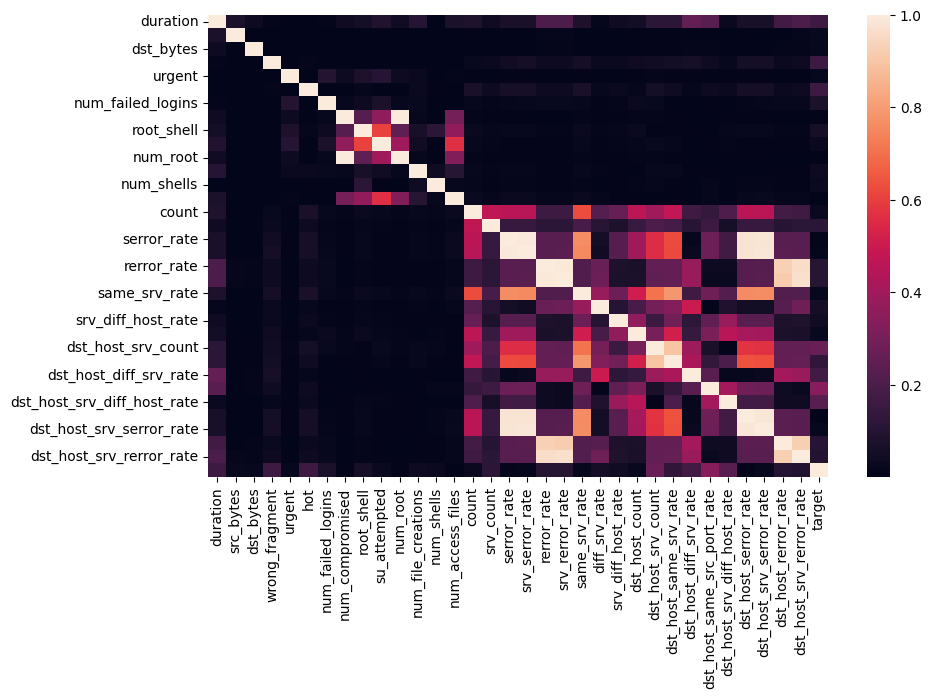

In [26]:
plt.figure(figsize=(10,6))
sns.heatmap(X.corr().apply(abs))

4.6 performing z-score normalization or standardization

In [27]:
std_scaler = StandardScaler()
x = std_scaler.fit_transform(X)

In [28]:
dump(std_scaler, 'std_scaler_revised.bin', compress=True)

['std_scaler_revised.bin']

5.4 Train_test_split

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

In [30]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

5.5 Compute Permutation Improtanc Score

In [32]:


# Train a random forest classifier (or any other model)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Compute permutation importance scores
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42)

# Get the importance scores and feature names
importance_scores = perm_importance.importances_mean

 

5.6 Select Top Features with set the PI_Threshold

In [34]:
feature_names  =['duration','src_bytes','dst_bytes','wrong_fragment','urgent','hot','num_failed_logins','num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','target']


In [98]:
# Print the size of importance_scores and feature_names
# print("importance_scores:", len(importance_scores))
# print("Size of feature_names:", len(feature_names))   


In [50]:
# Set the threshold
pithreshold = 0.0001

# Select  top features based on the threshold
selected_features = [feature_names[i] for i, score in enumerate(importance_scores) if score > pithreshold]

# Print selected features
print("Selected Features:", selected_features)

Selected Features: ['src_bytes', 'dst_bytes', 'wrong_fragment', 'hot', 'count', 'srv_count', 'same_srv_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'target']


In [41]:
print(len(selected_features))

14


In [42]:
selected_features_indices = [feature_names.index(feature) for feature in selected_features]

In [47]:
selected_features_indices

[1, 2, 3, 5, 14, 15, 20, 23, 24, 25, 27, 28, 29, 33]

In [48]:
len(X_train)

88181

In [45]:
X_train.shape

(88181, 34)

In [63]:

# Selecting columns using iloc
X_train_selected = X_train.iloc[:, selected_features_indices]
X_test_selected = X_test.iloc[:,selected_features_indices]


In [53]:
X_train_selected.shape

(88181, 14)

In [55]:
len(X_train_selected)

88181

In [56]:
type(X_train_selected)

pandas.core.frame.DataFrame

In [57]:
X_train_selected.shape

(88181, 14)

In [64]:
X_test_selected.shape

(37792, 14)

In [65]:
y_test.shape

(37792,)

In [66]:
y_train.shape

(88181,)

In [67]:
np.save('revised-scaled-input', X_train_selected)

In [68]:
X_test.shape

(37792, 34)

In [69]:
X_test_selected.shape

(37792, 14)

6. Model Training

6.1 Model selection

In [70]:
# Train LightGBM Classifier
lgbmc = LGBMClassifier(random_state=SEED)

In [72]:
models = {}


models['LightGBM Classifier']= lgbmc
scores = {}
for name in models:
  scores[name]={}
  
  for scorer in ['precision','recall']:
    scores[name][scorer] = cross_val_score(models[name], X_train_selected, y_train, cv=10, scoring=scorer)
    print("scores ", scores[name], scores)


[LightGBM] [Info] Number of positive: 36828, number of negative: 42534
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003072 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1975
[LightGBM] [Info] Number of data points in the train set: 79362, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.464051 -> initscore=-0.144045
[LightGBM] [Info] Start training from score -0.144045
[LightGBM] [Info] Number of positive: 36829, number of negative: 42534
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002745 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1973
[LightGBM] [Info] Number of data points in the train set: 79363, number of used features: 14
[LightGBM] [Info] 

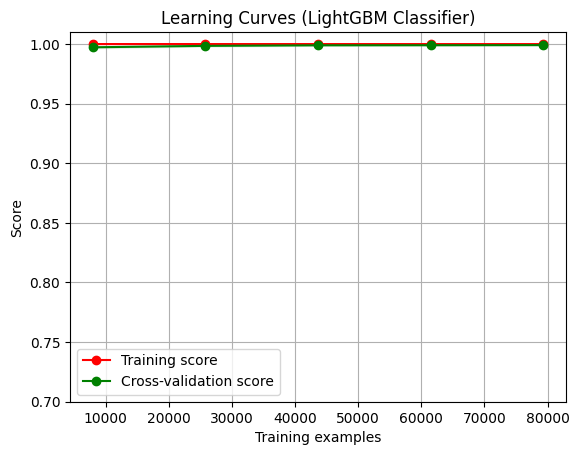

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


# Assuming you have defined SEED, x_train, y_train, and lgbmc as in the previous example
title = "Learning Curves (LightGBM Classifier)"
cv = 10  # 10-fold cross-validation
plot_learning_curve(lgbmc, title, X_train_selected, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=-1)

plt.show()


In [75]:
def line(name):
  return '*'*(25-len(name)//2)

for name in models:
  print(line(name), name, 'Model Validation', line(name))

  for scorer in ['precision','recall']:
    mean = round(np.mean(scores[name][scorer])*100,2)
    stdev = round(np.std(scores[name][scorer])*100,2)
    print ("Mean {}:".format(scorer),"\n", mean,"%", "+-",stdev)
    print()

    

**************** LightGBM Classifier Model Validation ****************
Mean precision: 
 99.88 % +- 0.05

Mean recall: 
 99.94 % +- 0.03



In [76]:
for name in models:
    for scorer in ['precision','recall']:
        scores[name][scorer] = scores[name][scorer].mean()
scores=pd.DataFrame(scores).swapaxes("index", "columns")*100

<Axes: >

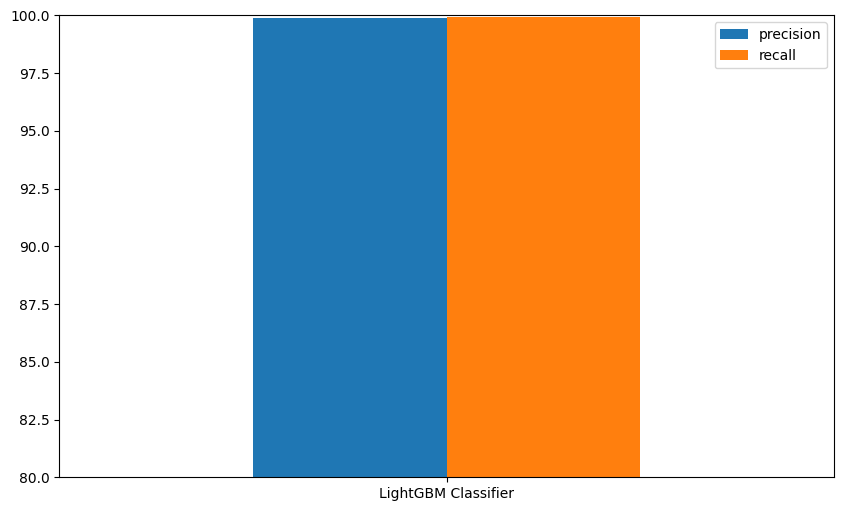

In [77]:
scores.plot(kind = "bar",  ylim=[80,100], figsize=(10,6), rot=0)

In [78]:
models = {}

models['LightGBM Classifier']= lgbmc
preds={}
for name in models:
    models[name].fit(X_train_selected, y_train)
    preds[name] = models[name].predict(X_test_selected)
    
print("Predictions complete.")

[LightGBM] [Info] Number of positive: 40921, number of negative: 47260
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003232 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1976
[LightGBM] [Info] Number of data points in the train set: 88181, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.464057 -> initscore=-0.144021
[LightGBM] [Info] Start training from score -0.144021
Predictions complete.


In [79]:
def line(name,sym="*"):
    return sym*(25-len(name)//2)
target_names=["normal","anamoly"]
for name in models:
    print(line(name), name, 'Model Testing', line(name))
    print(confusion_matrix(y_test, preds[name]))
    print(line(name,'-'))
    print(classification_report(y_test, preds[name], target_names=target_names))

**************** LightGBM Classifier Model Testing ****************
[[20062    21]
 [   18 17691]]
----------------
              precision    recall  f1-score   support

      normal       1.00      1.00      1.00     20083
     anamoly       1.00      1.00      1.00     17709

    accuracy                           1.00     37792
   macro avg       1.00      1.00      1.00     37792
weighted avg       1.00      1.00      1.00     37792



[LightGBM] [Info] Number of positive: 40921, number of negative: 47260
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002860 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1976
[LightGBM] [Info] Number of data points in the train set: 88181, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.464057 -> initscore=-0.144021
[LightGBM] [Info] Start training from score -0.144021


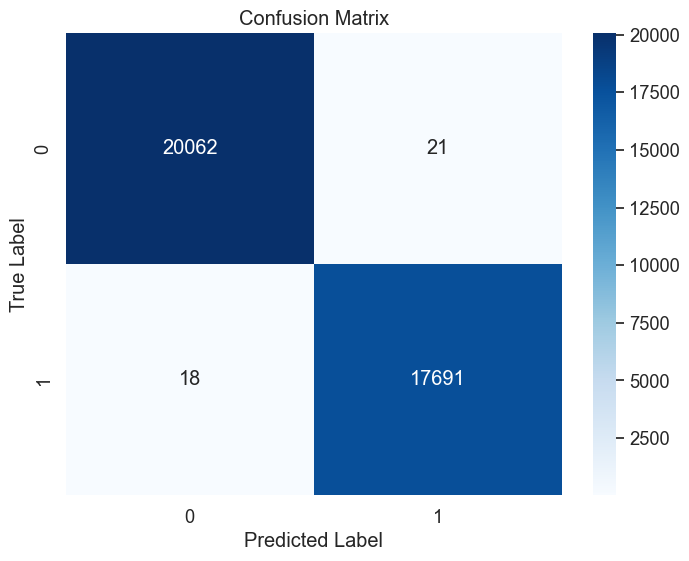

In [81]:


# Assuming you have defined SEED, x_train, y_train, and lgbmc as in the previous example
# Also assuming you have a validation dataset x_val and y_val
# Assuming you have imported LGBMClassifier and seaborn

# Train the model
lgbmc.fit(X_train_selected, y_train)

# Make predictions on the validation set
y_pred = lgbmc.predict(X_test_selected)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define classes (if applicable)
classes = np.unique(y_train)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font scale for better readability
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [83]:
f1s = {}
for name in models:
    f1s[name]=f1_score(y_test, preds[name])
f1s=pd.DataFrame(f1s.values(),index=f1s.keys(),columns=["F1-score"])*100
f1s

,F1-score
LightGBM Classifier,99.889896


<Axes: >

<Figure size 600x600 with 0 Axes>

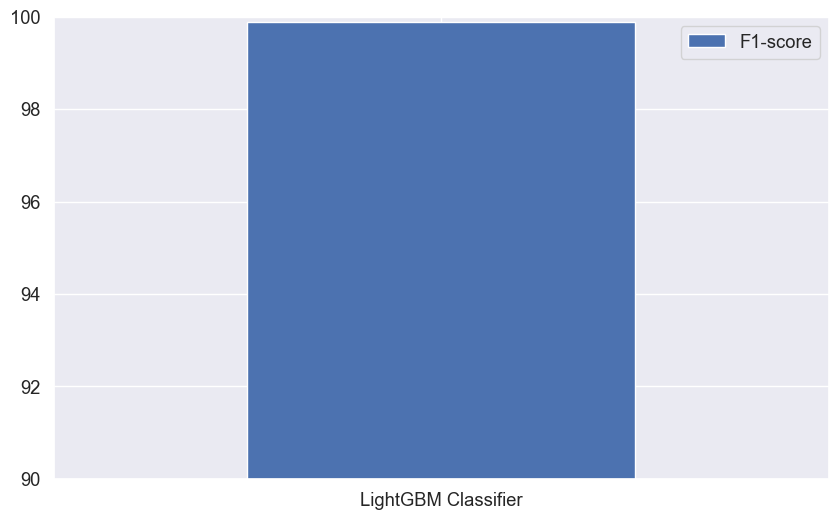

In [85]:
plt.figure(figsize=(6,6))
f1s.plot(kind = "bar",  ylim=[90,100], figsize=(10,6), rot=0)

In [86]:
import pickle
filename = 'optimized_revised_model.sav'
pickle.dump(lgbmc, open(filename, 'wb'))

In [87]:
loaded_model = pickle.load(open(filename, 'rb'))

In [91]:
def predict_with_model(features, loaded_model):
    # Ensure the input features are in the correct order and format
    input_features = np.array(features).reshape(1, -1)

    # Initialize a StandardScaler for scaling the features
    scaler = StandardScaler()
    
    z = np.load('revised-scaled-input.npy')
    
    scaler.fit_transform(z)

    # Scale the input features
    scaled_features = scaler.transform(input_features)

    # Make predictions using the loaded decision tree model
    prediction = loaded_model.predict(scaled_features)

    # Return the prediction
    return prediction

In [92]:
input_features = [292, 597, 0, 0, 201, 22, 1.0, 255, 252, 1.0, 0.0, 0.0, 0.0, 14] # Replace with your 10 features
model_predictions = predict_with_model(input_features, loaded_model)

print("Model Predictions:", model_predictions)

Model Predictions: [1]


In [93]:

input_features = [209, 374, 0, 0, 1, 2, 0.01, 204, 255, 1.0, 0.0, 0.0, 1.0, 21] # Replace with your 10 features
model_predictions = predict_with_model(input_features, loaded_model)

print("Model Predictions:", model_predictions)

Model Predictions: [0]


In [94]:
dataSet='./Rundata.txt'

In [96]:
try:
    line_count = 0  # Initialize a counter for the number of lines processed
    
    with open(dataSet, 'r') as file:  # Open the file specified by 'dataSet'
        for line in file:  # Iterate over each line in the file
            line = line.strip()  # Remove leading and trailing whitespaces
            if not line:  # Skip empty lines
                continue
            
            line_count += 1  # Increment the line count
            
            # Split the line by comma and assign each value to a variable
            values = line.split(',')
            # Assuming you have a function to process each row and predict the decision
            decision = predict_with_model(values, loaded_model)  # Predict the decision based on the values
            print(decision)
            if decision == 1:
                print(f"Line {line_count}: {values} ==> anomaly")
            else:
                print(f"Line {line_count}: {values} ==> normal")
    


except FileNotFoundError:
    print(f"File '{dataSet}' not found.")  # If the file is not found, print a message indicating that
except Exception as e:
    print(f"Error reading file: {e}")  # If any other exception occurs, print an error message


[0]
Line 1: ['0', '0', '0', '0', '229', '10', '0.04', '255', '10', '0.04', '0.0', '0.0', '0.0', '21'] ==> normal
[0]
Line 2: ['0', '0', '0', '0', '136', '1', '0.01', '255', '1', '0.0', '0.0', '0.0', '0.0', '21'] ==> normal
[1]
Line 3: ['12983', '0', '0', '0', '1', '1', '1.0', '134', '86', '0.61', '0.61', '0.02', '0.0', '21'] ==> anomaly
[1]
Line 4: ['20', '0', '0', '0', '1', '65', '1.0', '3', '57', '1.0', '1.0', '0.28', '0.0', '15'] ==> anomaly
[0]
Line 5: ['0', '15', '0', '0', '1', '8', '1.0', '29', '86', '0.31', '0.03', '0.02', '0.0', '11'] ==> normal
[1]
Line 6: ['267', '14515', '0', '0', '4', '4', '1.0', '155', '255', '1.0', '0.01', '0.03', '0.01', '21'] ==> anomaly
[0]
Line 7: ['1022', '387', '0', '0', '1', '3', '1.0', '255', '28', '0.11', '0.0', '0.0', '0.0', '21'] ==> normal
[1]
Line 8: ['129', '174', '0', '0', '1', '1', '1.0', '255', '255', '1.0', '0.0', '0.0', '0.01', '15'] ==> anomaly
[1]
Line 9: ['327', '467', '0', '0', '33', '47', '1.0', '151', '255', '1.0', '0.01', '0.03',

6.2 Model Testing on Validation Data

Though SVC classifier was close, but from the above results, we can observe that our model XGBoost Classifier and LightGBM Classifier perform the best on the validation data.

The evaluation metrics used are:

Precision: also called positive predictive value, is the fraction of correct positive predictions among all the positive predictions.

Recall: also known as sensitivity, is the fraction of correct positive predictions that were correct positives.

Precision and Recall can be calculated by:

- Precision (P) = TP / (TP + FP)
- Recall (R) = TP / (TP + FN)


7. Saving the Model

8. Making New Prediction

8.1 Load model

8.2 Predict the sample 

====================================END======================================